In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'./CrabAgePrediction.csv')
label_encoder = LabelEncoder()
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [3]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [4]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [5]:
columns_to_drop = ['Shucked Weight', 'Viscera Weight', 'Shell Weight']
df = df.drop(columns=columns_to_drop)

In [6]:
df.dtypes

Sex           int32
Length      float64
Diameter    float64
Height      float64
Weight      float64
Age           int64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5dbdce210>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5dc280450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5dc275f50>,
 'medians': [<matplotlib.lines.Line2D at 0x1c5dc281b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c5dc282710>,
 'means': []}

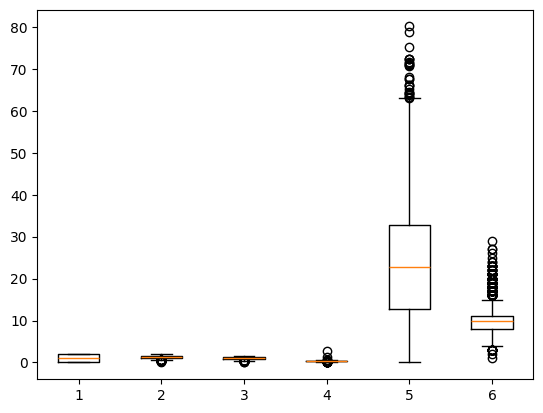

In [7]:
plt.boxplot(df)

In [8]:
# Calculate Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Drop rows with outliers and NaN values
df = df[~outliers].dropna().copy()

print("DataFrame without Rows Containing Outliers and NaN Values:")
print(df)

DataFrame without Rows Containing Outliers and NaN Values:
      Sex  Length  Diameter  Height     Weight  Age
0       0  1.4375    1.1750  0.4125  24.635715    9
1       2  0.8875    0.6500  0.2125   5.400580    6
2       1  1.0375    0.7750  0.2500   7.952035    6
3       0  1.1750    0.8875  0.2500  13.480187   10
4       1  0.8875    0.6625  0.2125   6.903103    6
...   ...     ...       ...     ...        ...  ...
3888    0  1.4625    1.1375  0.3250  24.819987    8
3889    0  1.5500    1.2125  0.4375  34.458817   10
3890    1  0.6250    0.4625  0.1625   2.012815    5
3891    1  1.0625    0.7750  0.2625  10.347568    6
3892    1  0.7875    0.6125  0.2125   4.068153    8

[3562 rows x 6 columns]


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5de4c1850>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5de4c3110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5de4c1390>,
 'medians': [<matplotlib.lines.Line2D at 0x1c5de4cc710>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c5de4cd290>,
 'means': []}

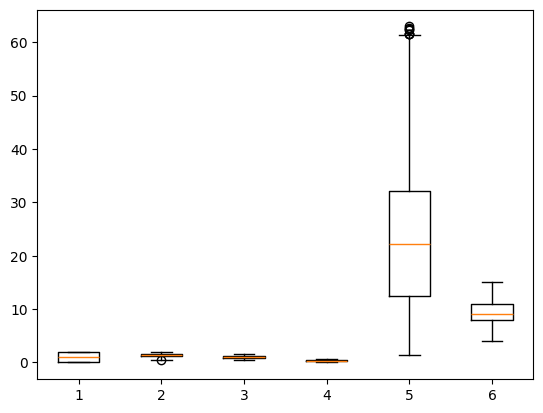

In [9]:
plt.boxplot(df)

In [10]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Weight,Age
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,1.058956,1.309503,1.018045,0.345708,22.917001,9.481190
std,0.819521,0.281652,0.232846,0.089207,13.040343,2.337997
min,0.000000,0.525000,0.400000,0.100000,1.318252,4.000000
25%,0.000000,1.125000,0.875000,0.287500,12.516304,8.000000
50%,1.000000,1.350000,1.050000,0.350000,22.133872,9.000000
75%,2.000000,1.525000,1.200000,0.412500,32.098721,11.000000
max,2.000000,1.925000,1.512500,0.600000,62.950065,15.000000


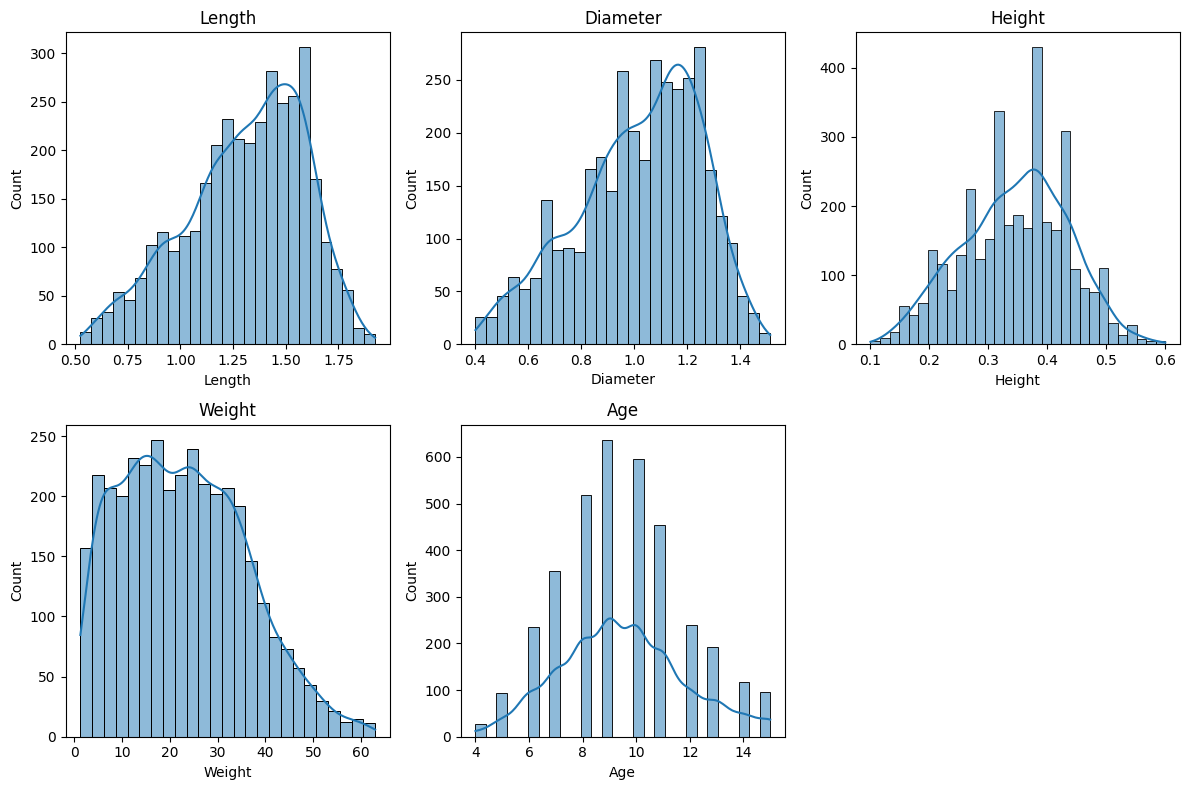

In [11]:
df.describe(include='all')

plt.figure(figsize=(12, 8))

for i, column in enumerate(['Length', 'Diameter', 'Height', 'Weight', 'Age'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [12]:
df.isnull().sum()

Sex         0
Length      0
Diameter    0
Height      0
Weight      0
Age         0
dtype: int64

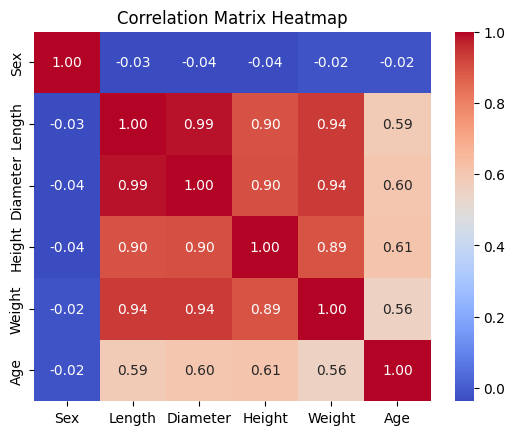

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
columns_to_drop = ['Sex']

df = df.drop(columns=columns_to_drop)

df

,Length,Diameter,Height,Weight,Age
0,1.4375,1.1750,0.4125,24.635715,9
1,0.8875,0.6500,0.2125,5.400580,6
2,1.0375,0.7750,0.2500,7.952035,6
3,1.1750,0.8875,0.2500,13.480187,10
4,0.8875,0.6625,0.2125,6.903103,6
...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,8
3889,1.5500,1.2125,0.4375,34.458817,10
3890,0.6250,0.4625,0.1625,2.012815,5
3891,1.0625,0.7750,0.2625,10.347568,6


<Axes: >

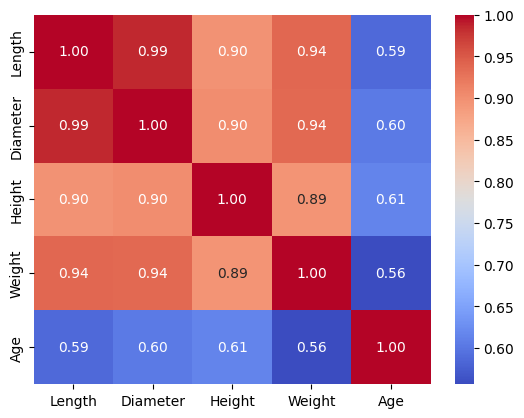

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

ip = df.drop(columns=['Age'])

op = df['Age']

# แบ่งข้อมูลเป็นชุด Train และ Test
x_train, x_test, y_train, y_test = train_test_split(ip, op, test_size=0.25)

# ทำการ Scale ข้อมูล
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# สร้าง GridSearchCV object สำหรับ KNN
knn_param_grid = {'n_neighbors': range(1, 11)}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid_search.fit(x_train_scaled, y_train)

# สร้าง GridSearchCV object สำหรับ SVM
svm_param_grid = {'C': [400, 500, 600], 'gamma': [0.01, 0.1, 1]}
svm_grid_search = GridSearchCV(SVC(kernel='rbf'), svm_param_grid, cv=5)
svm_grid_search.fit(x_train_scaled, y_train)

# ทดสอบโมเดลที่ดีที่สุดจาก Grid Search
best_knn_model = knn_grid_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_

# ทำการทดสอบกับชุดข้อมูล Test
knn_predictions = best_knn_model.predict(x_test_scaled)
svm_predictions = best_svm_model.predict(x_test_scaled)

# วัดประสิทธิภาพของโมเดล
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions, average='macro')
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions, average='macro')

print("KNN - Best Parameters:", knn_grid_search.best_params_)
print("KNN - Accuracy:", knn_accuracy)
print("KNN - F1 Score:", knn_f1_score)

print("SVM - Best Parameters:", svm_grid_search.best_params_)
print("SVM - Accuracy:", svm_accuracy)
print("SVM - F1 Score:", svm_f1_score)

KNN - Best Parameters: {'n_neighbors': 8}
KNN - Accuracy: 0.22895622895622897
KNN - F1 Score: 0.16443591329587817
SVM - Best Parameters: {'C': 700, 'gamma': 0.01}
SVM - Accuracy: 0.2558922558922559
SVM - F1 Score: 0.1492997747660951
